<a href="https://colab.research.google.com/github/Ishankj23/Deep-Learning/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df=pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

41

In [7]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [9]:
x=df.drop(columns=['PE'])
y=df[['PE']]

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [11]:
y

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43
...,...
9563,462.59
9564,432.90
9565,465.96
9566,450.93


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
con_pipe=Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                         ('scaler', StandardScaler())]).set_output(transform='pandas')

In [14]:
x_pre=con_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [20]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [21]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [22]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [23]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [25]:
# Initialize
model = Sequential()
# Input Layer
model.add(Input(shape=(xtrain.shape[1])))
# Add the hidden layers
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
# Output layer
model.add(Dense(units=1, activation='linear'))


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [28]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
192/192 [==============================] - 4s 4ms/step - loss: 206742.4062 - mae: 454.3769 - val_loss: 205115.2344 - val_mae: 452.6065
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 204418.0312 - mae: 451.8714 - val_loss: 201864.5469 - val_mae: 449.0941
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 198577.2031 - mae: 445.4851 - val_loss: 193072.4062 - val_mae: 439.3385
Epoch 4/100
192/192 [==============================] - 1s 4ms/step - loss: 185702.5625 - mae: 430.6888 - val_loss: 176547.4531 - val_mae: 419.6053
Epoch 5/100
192/192 [==============================] - 1s 3ms/step - loss: 165242.7500 - mae: 404.5547 - val_loss: 154104.8750 - val_mae: 388.6095
Epoch 6/100
192/192 [==============================] - 1s 3ms/step - loss: 141718.0156 - mae: 368.3969 - val_loss: 132122.2969 - val_mae: 350.0003
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 121616.7891 - mae: 327.6052 - val_loss: 116

In [29]:
model.evaluate(xtrain, ytrain)

240/240 [==============================] - 1s 4ms/step - loss: 20.3763 - mae: 3.5574


[20.376314163208008, 3.5573530197143555]

In [30]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 5ms/step - loss: 19.2873 - mae: 3.4612


[19.287324905395508, 3.461198329925537]

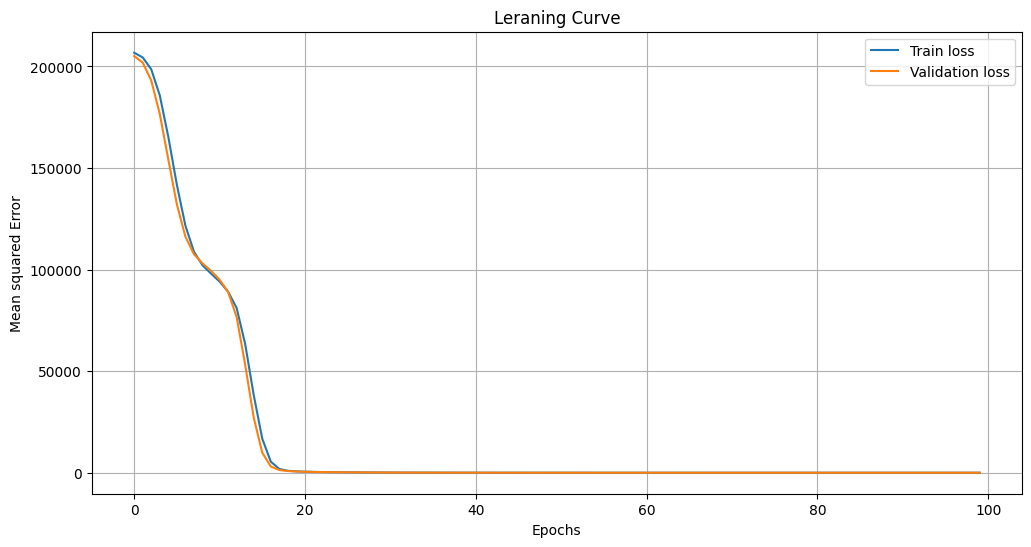

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Mean squared Error')
plt.title('Leraning Curve')
plt.legend()
plt.grid()
plt.show()

In [34]:
ypred_train=model.predict(xtrain)
ypred_train=model.predict(xtest)

60/60 [==============================] - 0s 3ms/step


In [35]:
ypred_train[0:5]

array([[436.19727],
       [436.8993 ],
       [460.98203],
       [474.9381 ],
       [437.19412]], dtype=float32)

In [36]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [37]:
ypred_test[0:5]

array([[436.19727],
       [436.8993 ],
       [460.98203],
       [474.9381 ],
       [437.19412]], dtype=float32)

In [38]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
def evaluate_model(model, x, y):
  ypred=model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean absolute Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score : {r2:.4f}')

In [43]:
evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 0s 2ms/step
Mean Squared Error : 20.38
Root Mean absolute Error : 4.51
Mean Absolute Error : 3.56
R2 Score : 0.9303


In [44]:
evaluate_model(model, xtest, ytest)

60/60 [==============================] - 0s 3ms/step
Mean Squared Error : 19.29
Root Mean absolute Error : 4.39
Mean Absolute Error : 3.46
R2 Score : 0.9326


In [45]:
model.save('PowerOutput.keras')

In [46]:
# load model
from keras.models import load_model

In [47]:
m = load_model('/content/PowerOutput.keras')

In [48]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
m.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[ 0.73338926, -0.01712071, -0.68437773, -0.06719635, -0.3048046 ,
         -0.48442018, -0.4315938 ,  0.51515585],
        [ 1.3986169 ,  0.85254985, -0.2754337 , -0.3540859 ,  0.13434531,
         -0.8673297 , -0.26304504, -0.39167374],
        [ 0.27133778,  0.4441177 ,  0.9377238 , -1.3290526 ,  0.05500483,
          0.05891099,  0.20136346, -0.25971815],
        [-0.2106294 , -1.1913663 ,  0.24696995, -0.4419773 ,  1.134039  ,
         -0.2501018 ,  0.81609523,  0.05345552]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([1.8545831, 4.3520465, 3.7892878, 3.9327962, 4.108561 , 4.2433057,
        4.221688 , 3.9792461], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[-0.14856818,  0.11754556,  0.01582522,  1.5685078 ],
        [ 0.04432919, -0.6248158 , -0.7035572 ,  3.9960544 ],
        [-0.6182544 ,  0.563077  ,  0.56884086, 